In [1]:
# import all of the necessary libraries 
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
# load the dataset
game = pd.read_csv('/content/GME_stock.csv')
game.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [3]:
# rearrange the columns
game = game.loc[:,['date', 'high_price','low_price','open_price','close_price','volume','adjclose_price']]
game

,date,high_price,low_price,open_price,close_price,volume,adjclose_price
0,2021-01-28,483.000000,112.250000,265.000000,193.600006,58815800.0,193.600006
1,2021-01-27,380.000000,249.000000,354.829987,347.510010,93396700.0,347.510010
2,2021-01-26,150.000000,80.199997,88.559998,147.979996,178588000.0,147.979996
3,2021-01-25,159.179993,61.130001,96.730003,76.790001,177874000.0,76.790001
4,2021-01-22,76.760002,42.320000,42.590000,65.010002,196784300.0,65.010002
...,...,...,...,...,...,...,...
4768,2002-02-20,9.875000,9.525000,9.600000,9.875000,1723200.0,6.648838
4769,2002-02-19,9.900000,9.375000,9.900000,9.550000,1852600.0,6.430017
4770,2002-02-15,10.025000,9.850000,10.000000,9.950000,2097400.0,6.699336
4771,2002-02-14,10.195000,9.925000,10.175000,10.000000,2755400.0,6.733003


In [4]:
# drop unnecessary rows
game = game.drop(labels=[4772], axis=0)
game

,date,high_price,low_price,open_price,close_price,volume,adjclose_price
0,2021-01-28,483.000000,112.250000,265.000000,193.600006,58815800.0,193.600006
1,2021-01-27,380.000000,249.000000,354.829987,347.510010,93396700.0,347.510010
2,2021-01-26,150.000000,80.199997,88.559998,147.979996,178588000.0,147.979996
3,2021-01-25,159.179993,61.130001,96.730003,76.790001,177874000.0,76.790001
4,2021-01-22,76.760002,42.320000,42.590000,65.010002,196784300.0,65.010002
...,...,...,...,...,...,...,...
4767,2002-02-21,9.925000,9.750000,9.840000,9.850000,1744200.0,6.632006
4768,2002-02-20,9.875000,9.525000,9.600000,9.875000,1723200.0,6.648838
4769,2002-02-19,9.900000,9.375000,9.900000,9.550000,1852600.0,6.430017
4770,2002-02-15,10.025000,9.850000,10.000000,9.950000,2097400.0,6.699336


In [5]:
# divide the dataset into a training and test datasets
training_set = game.iloc[:2386,1:2].values
test_set = game.iloc[2386:,1:2].values

In [6]:
# scale the datasets
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(training_set)

# Creating a data structure with 10 time-steps and 1 output
X_train = []
y_train = []

for i in range(10,2386):
  X_train.append(training_scaled[i-10:i,0])
  y_train.append(training_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

In [7]:
# Create the LSTM model
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=30, return_sequences= True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.1))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=30, return_sequences= True))
model.add(Dropout(0.1))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 30, return_sequences= True))
model.add(LSTM(units=30))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(Dropout(0.1))
# Adding the output layer
model.add(Dense(units=1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train,y_train, epochs = 30, batch_size = 50)

Epoch 1/30
48/48 [==============================] - 21s 69ms/step - loss: 5.8935e-04
Epoch 2/30
48/48 [==============================] - 4s 76ms/step - loss: 1.9012e-04
Epoch 3/30
48/48 [==============================] - 3s 59ms/step - loss: 1.1293e-04
Epoch 4/30
48/48 [==============================] - 3s 66ms/step - loss: 1.2717e-04
Epoch 5/30
48/48 [==============================] - 3s 66ms/step - loss: 1.0376e-04
Epoch 6/30
48/48 [==============================] - 3s 69ms/step - loss: 7.6436e-05
Epoch 7/30
48/48 [==============================] - 3s 68ms/step - loss: 7.6353e-05
Epoch 8/30
48/48 [==============================] - 1s 29ms/step - loss: 6.8000e-05
Epoch 9/30
48/48 [==============================] - 1s 29ms/step - loss: 5.3473e-05
Epoch 10/30
48/48 [==============================] - 1s 29ms/step - loss: 6.3427e-05
Epoch 11/30
48/48 [==============================] - 1s 28ms/step - loss: 4.4105e-05
Epoch 12/30
48/48 [==============================] - 1s 29ms/step - loss:

In [8]:
# reshape the dataset
data_training_set = game.iloc[:2386,1:2]
data_test_set = game.iloc[2386:,1:2]
data_total = pd.concat((data_training_set, data_test_set), axis = 0)
inputs = data_total[len(data_total) - len(data_test_set) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, 2386):
  X_test.append(inputs[i-10:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [9]:
# create a training test with the high price column
real_price = data_test_set.loc[:,['high_price']].values
real_price

array([[22.69000053],
       [23.12000084],
       [23.36000061],
       ...,
       [ 9.89999962],
       [10.02499962],
       [10.19499969]])

In [10]:
# predict the price of the gamestop stock 
game_predict = model.predict(X_test)
game_predict = sc.inverse_transform(game_predict)

75/75 [==============================] - 2s 9ms/step


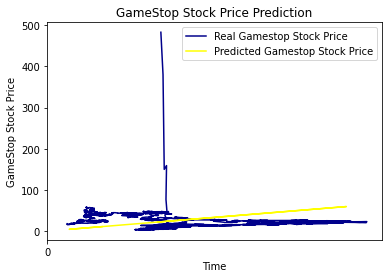

In [11]:
# plot the gamestop stock prediction
plt.plot(real_price, data_training_set, color = 'darkblue',label = 'Real Gamestop Stock Price')
plt.plot(game_predict, game_predict, color = 'yellow',label = 'Predicted Gamestop Stock Price')
plt.xticks(np.arange(0,10,50))
plt.title('GameStop Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GameStop Stock Price')
plt.legend()
plt.show()